In [1]:
import os
import numpy as np
import pandas as pd
for dirname, _, filenames in os.walk('../input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data=pd.read_csv("../input/titanic/train.csv")
data.head()

../input/titanic/train.csv
../input/titanic/test.csv
../input/titanic/gender_submission.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.shape

(891, 12)

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data=data.drop(["Name"],axis=1)

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Since the column Cabin has Maximum number of Null values which is not possible to debug ,so we can drop this Column.**

In [6]:
data=data.drop({"Cabin","Ticket"},axis=1)

In [7]:
data.fillna(data.median(),inplace=True)

# Visualizing the Datas

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

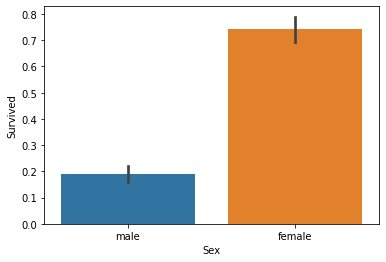

In [9]:
sns.barplot(x="Sex",y="Survived",data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

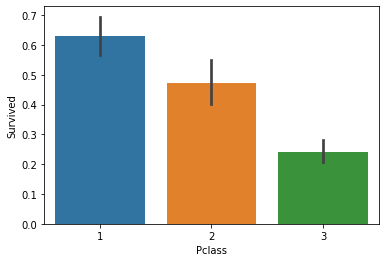

In [10]:
sns.barplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

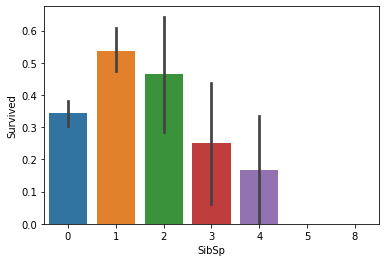

In [11]:
sns.barplot(x='SibSp',y='Survived',data=data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

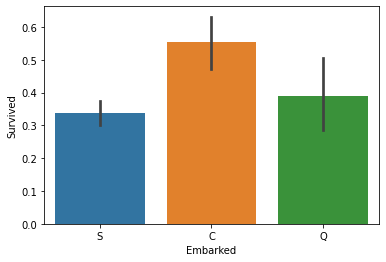

In [12]:
sns.barplot(x='Embarked',y='Survived',data=data)

**Filling Null values in Embarked Column and Convert it into Integers**

In [13]:
data["Embarked"].fillna('S',inplace=True)

In [14]:
data["Embarked"].replace({'S':1,'Q':2,'C':3},inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


**Now we Converted every columns into a float and Integers.**

# Finding and Correcting Outliers

In [16]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.264823
dtype: float64

In [17]:
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))
data['SibSp']=data['SibSp'].clip(lower=data['SibSp'].quantile(0.05),upper=data['SibSp'].quantile(0.95))
data['Parch']=data['Parch'].clip(lower=data['Parch'].quantile(0.05),upper=data['Parch'].quantile(0.95))
data['Fare']=data['Fare'].clip(lower=data['Fare'].quantile(0.05),upper=data['Fare'].quantile(0.95))

<AxesSubplot:xlabel='Fare'>

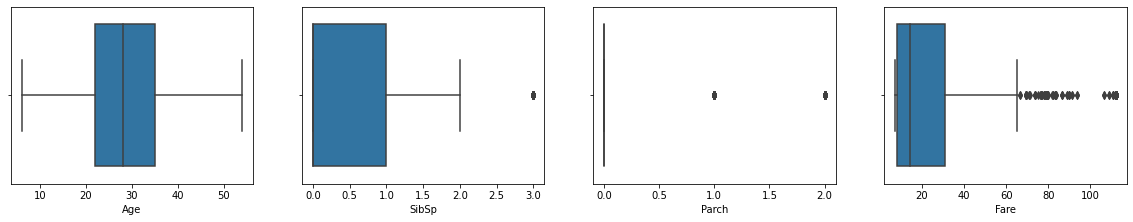

In [18]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Age'])
plt.subplot(4,4,2)
sns.boxplot(data['SibSp'])
plt.subplot(4,4,3)
sns.boxplot(data['Parch'])
plt.subplot(4,4,4)
sns.boxplot(data['Fare'])

In [19]:
data['Fare']=data['Fare'].clip(lower=data['Fare'].quantile(0.15),upper=data['Fare'].quantile(0.85))

In [20]:
data['SibSp']=data['SibSp'].clip(lower=data['SibSp'].quantile(0.07),upper=data['SibSp'].quantile(0.93))

<AxesSubplot:xlabel='Fare'>

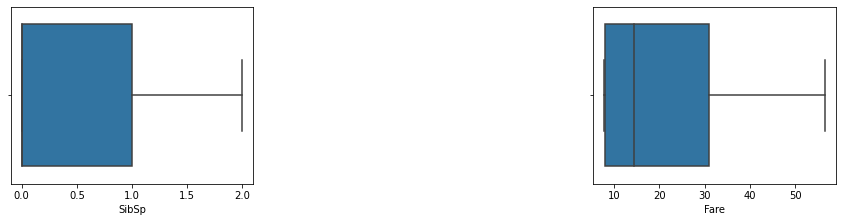

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['SibSp'])
plt.subplot(4,4,3)
sns.boxplot(data['Fare'])

In [22]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.280973
SibSp          1.339934
Parch          1.679480
Fare           0.944933
Embarked       1.264823
dtype: float64

**Checking Datas using correlation Heatmap**

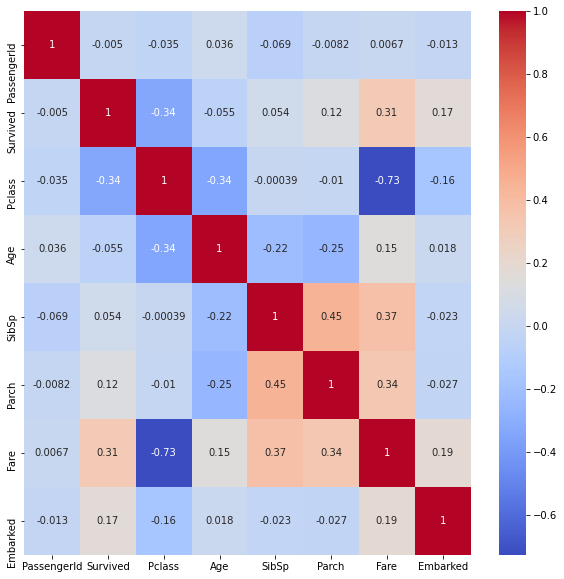

In [23]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [24]:
data['Sex'].replace({'male':1,'female':2},inplace=True)

# Training and Model Creation

In [25]:
trainx=data.loc[:,data.columns!='Survived'].values[:,0:]
trainy=data['Survived'].values

In [26]:
test=pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test=test.drop({"Name","Cabin","Ticket"},axis=1)

In [28]:
test.replace({"S":1,"Q":2,"C":3,"male":1,"female":2},inplace=True)

In [29]:
test.fillna(data.median(),inplace=True)

In [30]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [31]:
testx=test.values[:,0:]

# Importing Naive-Bayes Algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [33]:
model=GaussianNB()

In [34]:
model.fit(trainx,trainy)
s=model.predict(testx)
print(s)
print(s.shape)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0]
(418,)


**submission.csv**

In [35]:
submission=pd.DataFrame({"PassengerId":test["PassengerId"].values,"Survived":s})

In [36]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [37]:
submission.shape

(418, 2)

In [38]:
submission.to_csv('submission21.csv',index = False)

**The Model gives the Accuracy of 85.53 percentile**